In [6]:
!python -m pip install "../."
# !python -m pip install matplotlib

Processing /home/daniil/program/python/project/ImgDoc
  Preparing metadata (setup.py) ... done
  Created wheel for imgdoc: filename=imgdoc-0.0.4-py3-none-any.whl size=12371 sha256=df72d576b383f3157bf3722ac86a0a4a087f3dbe844987cb5fa120273f47221e
  Stored in directory: /tmp/pip-ephem-wheel-cache-v6tzgnzz/wheels/fb/1a/ed/7d9f75c4ac33138e7c2a11154029a6594122b85a7ed546b6bf
Successfully built imgdoc
  Attempting uninstall: imgdoc
    Found existing installation: imgdoc 0.0.4
    Uninstalling imgdoc-0.0.4:
      Successfully uninstalled imgdoc-0.0.4

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import pytesseract
from img_doc.extractors.word_extractors import BaseWordExtractor
from img_doc.data_structures import Word
import numpy as np
from typing import List

class TesseractWordExtractor(BaseWordExtractor):
    def extract_from_img(self, img: np) -> List[Word]:
        tesseract_bboxes = pytesseract.image_to_data(
            config="-l rus",
            image=img,
            output_type=pytesseract.Output.DICT)
        word_list = []
        for index_bbox, level in enumerate(tesseract_bboxes["level"]):
            if level == 5:
                word = Word(text = tesseract_bboxes["text"][index_bbox])
                word.set_point_and_size({
                    "x_top_left":tesseract_bboxes["left"][index_bbox],
                    "y_top_left":tesseract_bboxes["top"][index_bbox],
                    "width":tesseract_bboxes["width"][index_bbox],
                    "height": tesseract_bboxes["height"][index_bbox],
                })
                word_list.append(word)
        return word_list

In [2]:
from img_doc.data_structures import Image
import os

image = Image()
image.set_img_from_path(os.path.join("img", "5.jpg"))

word_ext = TesseractWordExtractor()
words = word_ext.extract_from_img(image.img)
print(words)

[<img_doc.data_structures.document.word.Word object at 0x7fe05ea82f20>, <img_doc.data_structures.document.word.Word object at 0x7fe05ea3a830>, <img_doc.data_structures.document.word.Word object at 0x7fe0263af820>, <img_doc.data_structures.document.word.Word object at 0x7fe026375ba0>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e5240>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e4f70>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e5090>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e5150>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e5330>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e5270>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e53c0>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e5480>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e5540>, <img_doc.data_structures.document.word.Word object at 0x7fe0263e5600>, <img_

In [3]:
from img_doc.extractors.block_extractors.block_extractor_from_word import KMeanBlockExtractor
kmeanext = KMeanBlockExtractor()


[<img_doc.data_structures.document.block.Block object at 0x7fe017268640>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba5450>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba55d0>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba5690>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba5750>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba58d0>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba5990>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba5a50>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba5b10>, <img_doc.data_structures.document.block.Block object at 0x7fe016ba5c90>]
21.454741379310345


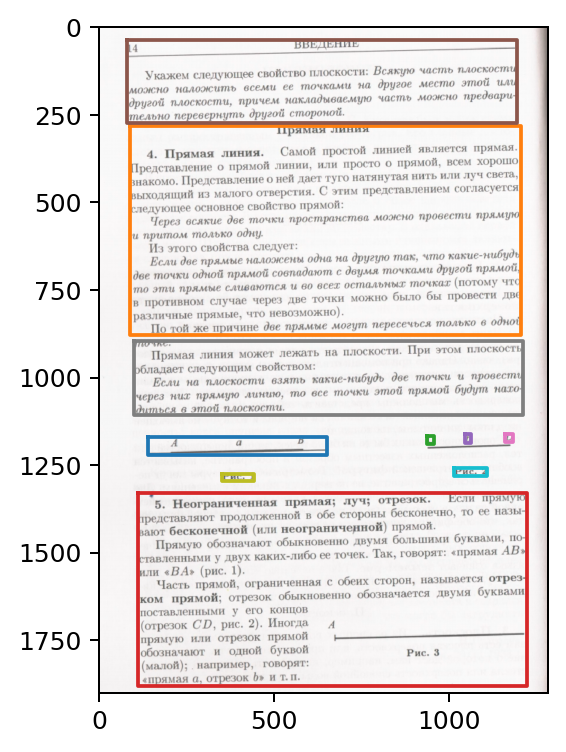

In [9]:
import matplotlib.pyplot as plt

color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(image.img)
history = {"no_join_blocks":[], "dist_word": 0 }
blocks = kmeanext.extract_from_word(words, history)
print(blocks)
print(history["dist_word"])
for block in blocks:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])

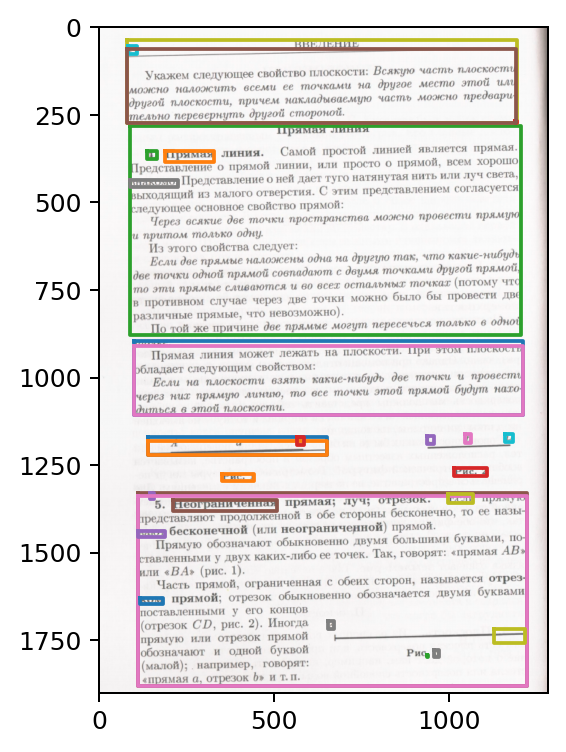

In [11]:
color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(image.img)

for block in history["no_join_blocks"]:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])

(1221.0, 1169.0)

<Figure size 1152x864 with 0 Axes>

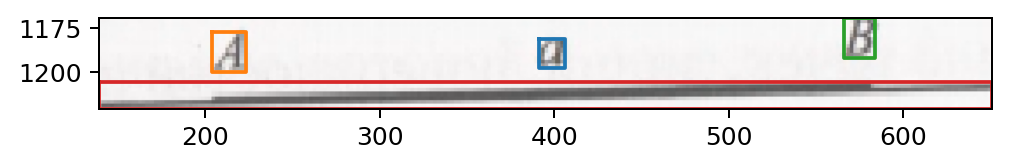

In [13]:

blocki = blocks[0]
blocks2 = kmeanext.extract_from_word(blocki.words, {})
plt.figure(dpi=180)
color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(image.img)
for block in blocks2:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])

x0 = blocki.segment.x_top_left
y0 = blocki.segment.y_top_left
x1 = blocki.segment.x_bottom_right
y1 = blocki.segment.y_bottom_right
plt.xlim([x0, x1])
plt.ylim([y1, y0])

In [14]:
for word in blocki.words:
    print(word.text)

А
а
о
В
